<a href="https://colab.research.google.com/github/enigma-137/ai-engineering-practices/blob/main/SVM_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))
df.head()

,A,B,C,D
0,0.682357,-0.809695,0.256171,-0.745290
1,2.807088,-0.716916,-0.064535,-1.738740
2,-0.283885,-0.860795,1.840580,-0.071461
3,0.413304,-1.579900,-0.598218,0.698881
4,-0.567645,0.447819,0.880909,-0.838000


In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df_feat.head()

df_feat['target'] = cancer.target
df_feat['target'] = df_feat['target'].map({0: 'malignant', 1: 'benign'})

In [4]:
df_feat.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


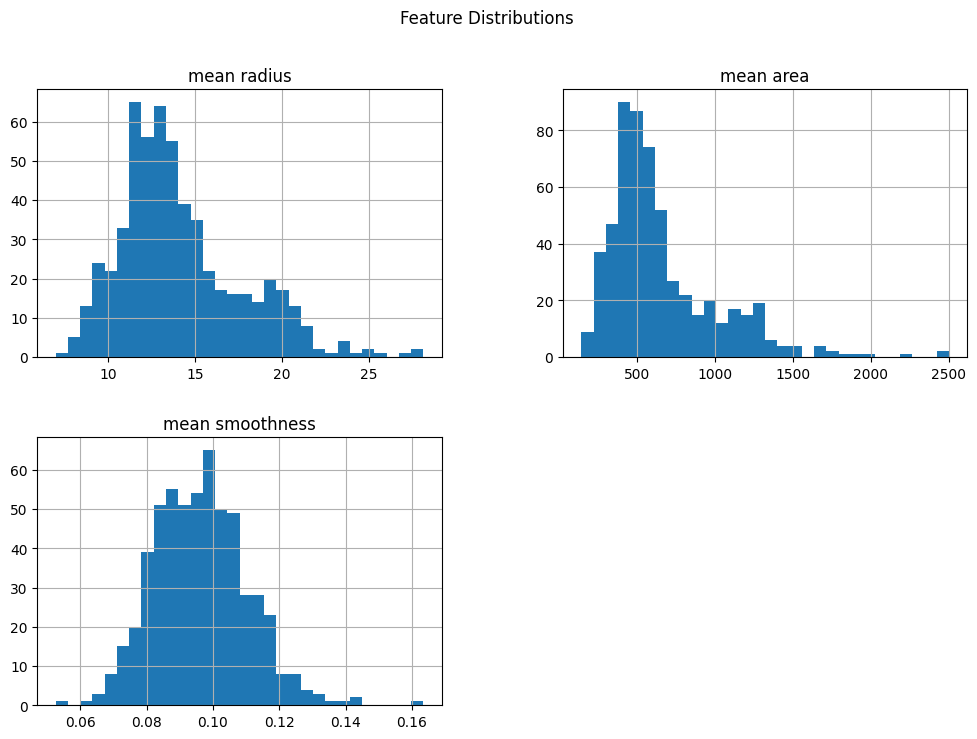

In [6]:
df_feat[['mean radius', 'mean area', 'mean smoothness']].hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

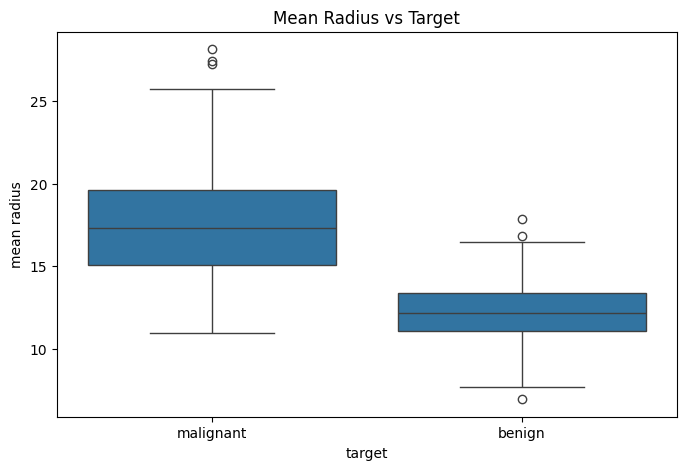

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='mean radius', data=df_feat)
plt.title("Mean Radius vs Target")
plt.show()

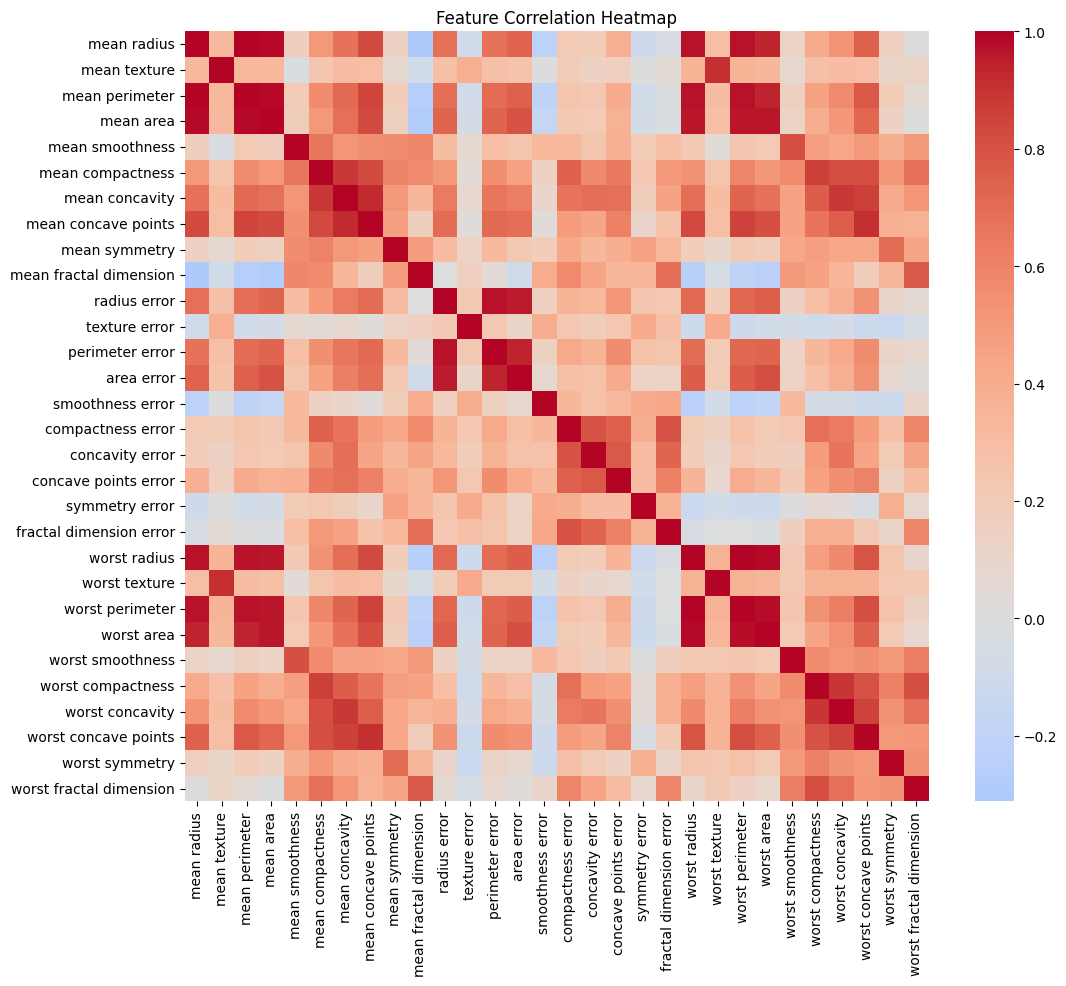

In [13]:
plt.figure(figsize=(12,10)) #heat map
sns.heatmap(df_feat.drop('target', axis=1).corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

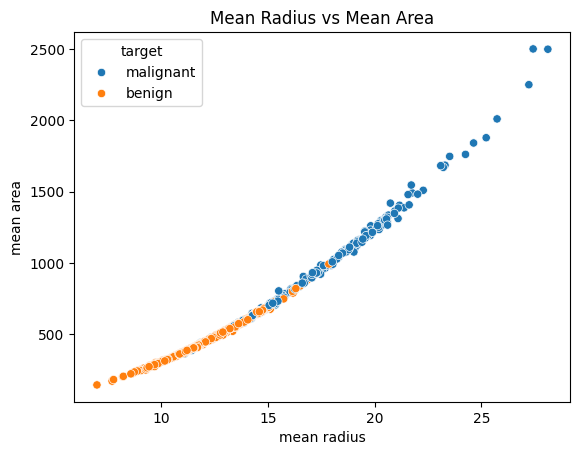

In [14]:
# Scatterplot of two features
sns.scatterplot(x='mean radius', y='mean area', hue='target', data=df_feat)
plt.title("Mean Radius vs Mean Area")
plt.show()

In [15]:
# from re import X
from sklearn.model_selection import train_test_split
X = df_feat.drop('target', axis=1)
y = df_feat['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [16]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [17]:
predict = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

      benign       0.91      0.97      0.94       105
   malignant       0.95      0.85      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

[[102   3]
 [ 10  56]]


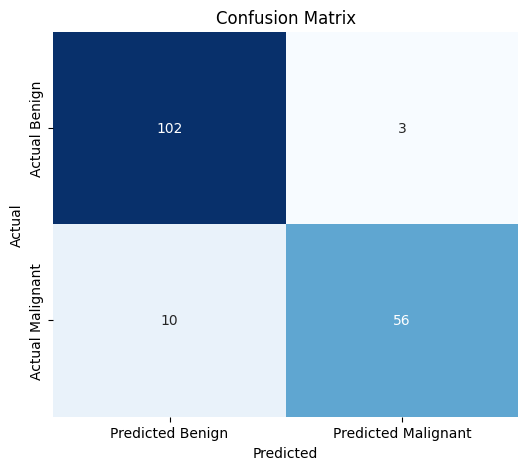

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [20]:
#True negative, false negative, true negative, true positive

In [22]:
from sklearn.model_selection import GridSearchCV #no longer imported from gridsearch
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train, y_train) #AI

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [23]:
grid.best_params_  #check for the best


{'C': 1, 'gamma': 0.0001}

In [26]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [27]:
gridpredict = grid.predict(X_test)
print(classification_report(y_test, gridpredict))
print(confusion_matrix(y_test, gridpredict))

              precision    recall  f1-score   support

      benign       0.94      0.96      0.95       105
   malignant       0.94      0.89      0.91        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

[[101   4]
 [  7  59]]


In [ ]:
#Best explanation, True negative(101), correctly predict that the small is small, false positive(4), predicted small is big, false negatives, predicted Big is small, true positive predicted Big is Big